## 2. Machine Learning for Regression

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.1 Data Preparation

In [9]:
#data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
#data2 = f'data/{data}'
#!wget $data2

--2022-09-20 06:18:35--  http://data/https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving data (data)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘data’


In [10]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-20 06:18:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  1,28MB/s    in 1,1s    

2022-09-20 06:18:56 (1,28 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [11]:
!mv housing.csv ./data

### 2.2 Exploratory Data Analysis

In [156]:
df = pd.read_csv('data/housing.csv')

In [157]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [158]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [159]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

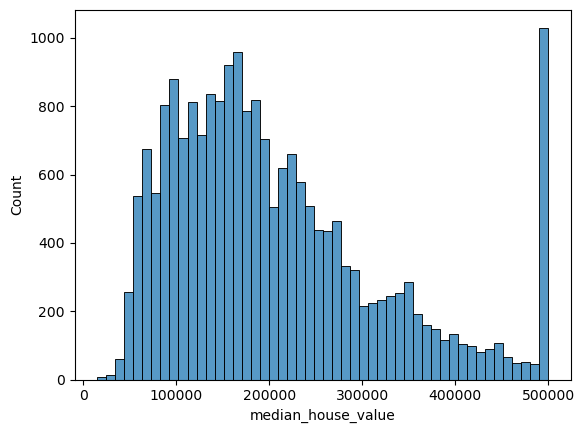

In [160]:
sns.histplot(df.median_house_value, bins=50)

In [161]:
Features = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [162]:
# redefining df with only the features
df = df.iloc[:, df.columns.isin(Features)]

In [163]:
assert(set(df.columns.to_list()) == set(Features))

#### Question 1
Find a feature with missing values. How many missing values does it have?

In [164]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [165]:
df.describe()[['total_bedrooms']]

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


#### Question 2
What's the median (50% percentile) for variable 'population'?

In [166]:
df.describe()[['population']]

,population
count,20640.000000
mean,1425.476744
std,1132.462122
min,3.000000
25%,787.000000
50%,1166.000000
75%,1725.000000
max,35682.000000


#### Question 3

In [167]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
assert(n == n_val + n_test + n_train)
print(f'n_val = {n_val}, n_test = {n_test}, n_train = {n_train}')

n_val = 4128, n_test = 4128, n_train = 12384


In [168]:
idx = np.arange(n)

In [169]:
np.random.seed(42)
np.random.shuffle(idx)

In [170]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [171]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [172]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [173]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [174]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [175]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [176]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [79]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

##### filling missing data with 0

In [123]:
df_train_f0 = df_train.fillna(0)

In [124]:
df_train_f0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250


In [125]:
df_train_f0.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,-119.555670,35.610346,28.699855,2619.001453,524.563146,1413.292151,495.653666,3.871533
std,1.997588,2.130254,12.643342,2193.231114,424.229667,1115.069002,381.551044,1.891883
min,-124.350000,32.540000,1.000000,2.000000,0.000000,6.000000,2.000000,0.499900
25%,-121.780000,33.930000,18.000000,1441.000000,289.000000,781.000000,278.000000,2.566350
50%,-118.490000,34.250000,29.000000,2116.500000,427.000000,1159.000000,406.000000,3.547500
75%,-118.000000,37.710000,37.000000,3124.500000,636.000000,1706.000000,600.000000,4.742600
max,-114.490000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


In [126]:
df_train_f0 = df_train_f0.values
df_train_f0

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [142]:
w0, w = train_linear_regression(df_train_f0, y_train)

# using validation dataset to evaluate the model
y_pred = w0 + df_val.dot(w)

In [143]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Result of the model filled with zero

In [144]:
rmse(y_val, y_pred)

0.3295330365225461

#### Filling the missing data in tota_bedrooms with the mean

In [145]:
mean_bedrooms = df_train['total_bedrooms'].mean()
df_train_fm = df_train.copy()
df_train_fm['total_bedrooms'].fillna(value=mean_bedrooms, inplace=True)

In [146]:
df_train_fm.describe()[['total_bedrooms']]

,total_bedrooms
count,12384.000000
mean,533.480332
std,418.679837
min,2.000000
25%,297.000000
50%,436.000000
75%,636.000000
max,6445.000000


In [147]:
df_train_fm.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [148]:
df_train_fm = df_train_fm.values
df_train_fm

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [149]:
w0, w = train_linear_regression(df_train_fm, y_train)
y_pred = w0 + df_val.dot(w)

#### Result of the model filled with mean

In [150]:
rmse(y_val, y_pred)

0.3290195439006594

R/ both models are equally bad

#### Question 4

In [151]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [179]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0 -11.686975241722367 0.33
1e-06 -11.686959175597698 0.33
0.0001 -11.685368865326225 0.33
0.001 -11.670931317790998 0.33
0.01 -11.528493585934847 0.33
0.1 -10.27450028213499 0.33
1 -4.920480897663232 0.33
5 -1.4820957456380226 0.34
10 -0.7899311832160492 0.34


In [ ]:
R/ The best answer in my results was r 5 and 10 but is not in the google form

#### Question 5

In [185]:
RMSE_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    RMSE_scores.append(score)
    
round(np.std(RMSE_scores), 3)

0.005

#### Question 6